In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# For warnings
import warnings
warnings.filterwarnings("ignore")

#Load dataset

In [110]:
df=pd.read_csv('/content/International_airline_passengers.csv')

In [111]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [113]:
#check the null values
df.isnull().sum()

,0
Month,0
Passengers,0


In [114]:
#check the duplicated dataset
df.duplicated().sum()

0

# convert 'Month' column is a datetime object

In [115]:
# Ensure the 'Month' column is a datetime object
df['Month'] = pd.to_datetime(df['Month'])

#Reset the index as per month date

In [116]:
# Set 'Month' as the index
df.set_index('Month', inplace=True)

##Visualize the Data

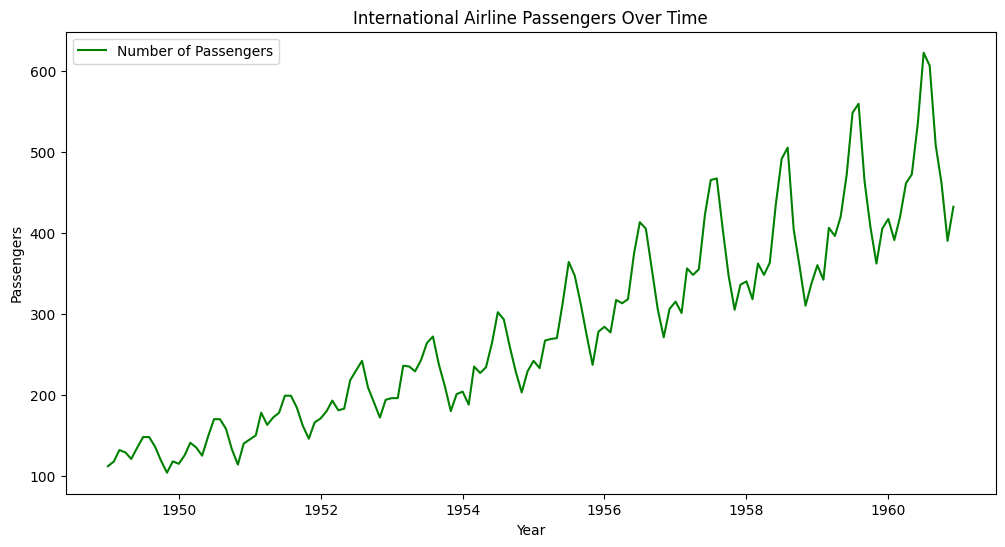

In [117]:
#plot the dataset timeseries over the time
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Number of Passengers',color='green')
plt.title('International Airline Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

<Axes: ylabel='Passengers'>

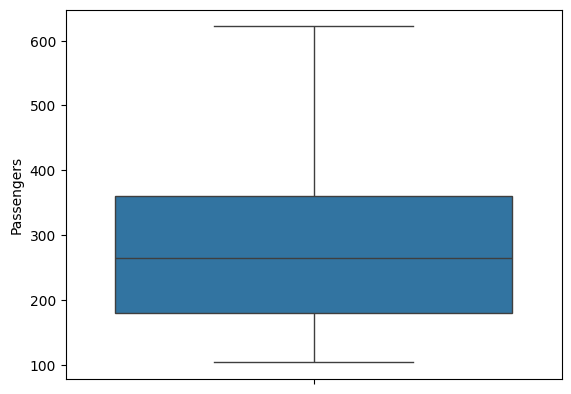

In [118]:
#check the outlier
sns.boxplot(df['Passengers'])

##Split the Data into Training and Testing Sets

In [119]:
# Splitting the data into 80% training and 20% testing
train_size=int(len(df)*0.8)
train,test=df[:train_size],df[train_size:]

#Apply Arima model

In [120]:
# Fit the ARIMA model in train dataset
model_arima = ARIMA(train, order=(5, 1, 0))
arima_model_fit = model_arima.fit()

***Make Predictions***

In [121]:
# Forecast the values for the test set
forecast_arima = arima_model_fit.forecast(steps=len(test))
forecast_arima = pd.Series(forecast_arima, index=test.index)

***plot the result forcasting passanger prediction***

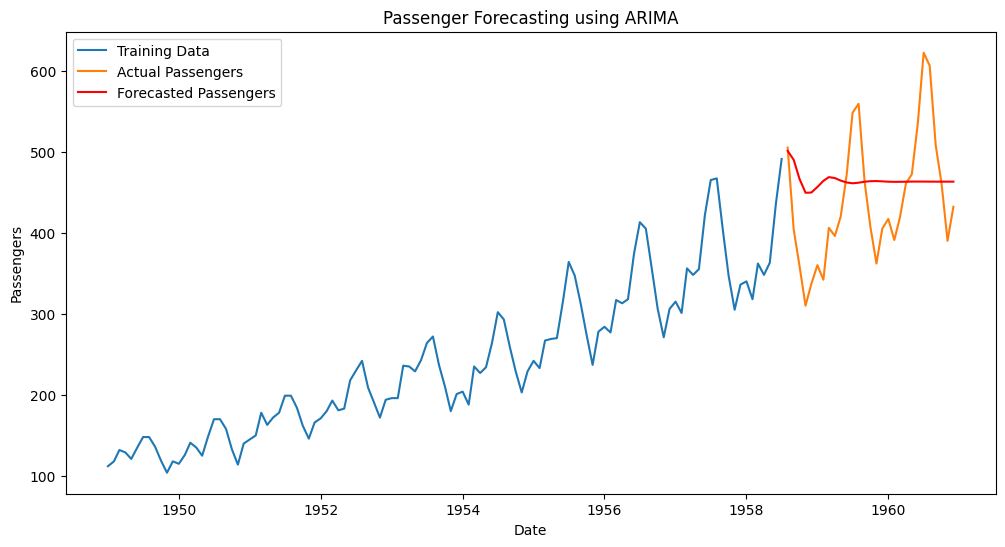

In [122]:
# Plot the results of Arima Forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Passengers')
plt.plot(forecast_arima, label='Forecasted Passengers', color='red')
plt.title('Passenger Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

ARIMA prediction is not perfect comparing to test data

***Evaluate the Model ARIMA***

In [123]:
# Calculate Mean Squared Error between test and forcast
mse = mean_squared_error(test, forecast_arima)
print(f'ARIMA mse: {mse:.2f}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'ARIMA rmse: {rmse:.2f}')


ARIMA mse: 6506.67
ARIMA rmse: 80.66


ARIMA model lot of error apply other timeSeries model .who can capture seasonal trends

#Seasonal Decomposition of Time Series (SARIMA)

In [124]:
model_sarima=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
#model fit
sarima_model_fit=model_sarima.fit()

***Make  forecast using this fit model***

In [125]:
forecast_sarima=sarima_model_fit.forecast(steps=len(test))
#make it series dataset
forecast_sarima=pd.Series(forecast_sarima,index=test.index)

***plot the result forcasting passanger prediction***

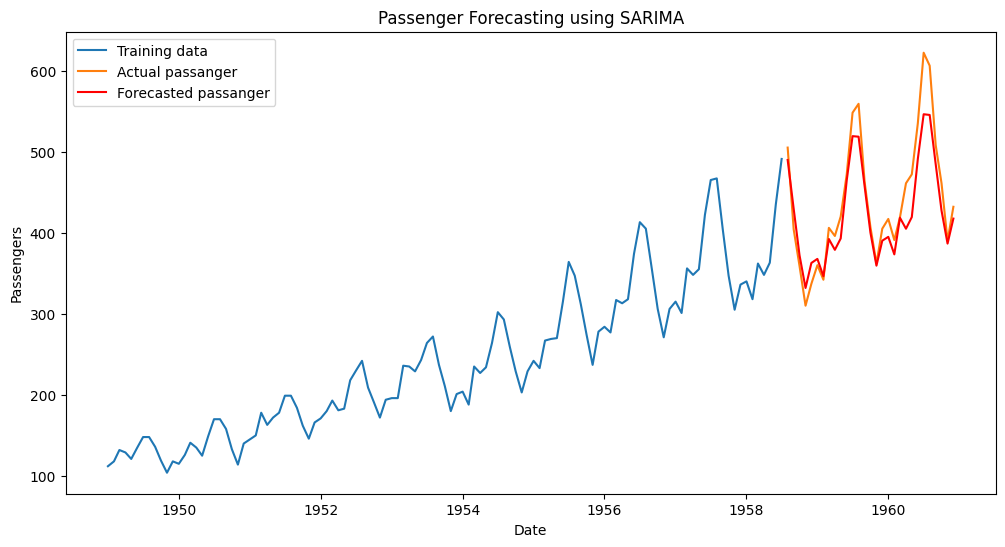

In [126]:
plt.figure(figsize=(12,6))
plt.plot(train,label='Training data')
plt.plot(test,label='Actual passanger')
plt.plot(forecast_sarima,label='Forecasted passanger',color='red')
plt.title('Passenger Forecasting using SARIMA')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

***evaluate model sarima***

In [127]:
mse=mean_squared_error(test,forecast_sarima)
print(f'SARIMA mse: {mse:.2f}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'SARIMA rmse: {rmse:.2f}')

SARIMA mse: 908.35
SARIMA rmse: 30.14


#apply Exponential Smoothing (ETS) model

In [128]:
# Fit the model
model_ets = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='add', seasonal_periods=12)
ets_model_fit = model_ets.fit()

In [129]:
# Forecast the model
forecast_ets = ets_model_fit.forecast(steps=len(test))
#fit forcast data in series for chart visualiztion
forecast_ets=pd.Series(forecast_ets,index=test.index)

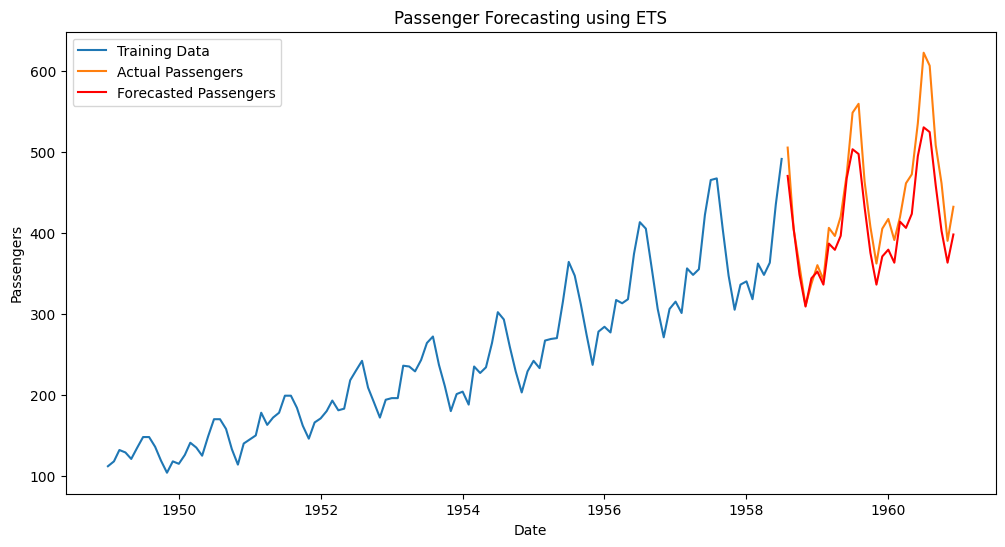

In [130]:
# Plot the results of ETS model prediction
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Passengers')
plt.plot(forecast_ets, label='Forecasted Passengers', color='red')
plt.title('Passenger Forecasting using ETS')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

ETS model forecasting of passanger is nearly closer to test data

***Evaluate ETS model between test and forecast data:-***

In [131]:
#check out mse of this model
mse=mean_squared_error(test,forecast_ets)
print(f'ETS mse: {mse:.2f}')

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'ETS rmse: {rmse:.2f}')

ETS mse: 1541.40
ETS rmse: 39.26


ETS nicely fit in test data with less error compare to ARIMA but not better then SARIMA

#Save SARIMA model

In [132]:
import pickle
with open('Sarima_model.pkl','wb') as pkl_file:
  pickle.dump(sarima_model_fit,pkl_file)

#load the saved  model sarima

In [133]:
with open('Sarima_model.pkl','rb') as pkl_file:
  sarima_model=pickle.load(pkl_file)

#Applying this model use future passanger forecasting
-let forecast next one year passanger

In [134]:
future_forecast=sarima_model.get_forecast(steps=12) #step= 12 month forecasting

In [135]:
# Get the forecasted values(mean) dataset from future_forecast data
future_forecast_values =future_forecast.predicted_mean

In [136]:
#tahe period of 12 month
future_steps=12

In [137]:
#get future date using date_range
future_dates = pd.date_range(start=df.index[-1], periods=future_steps+ 1, freq='M')[1:]

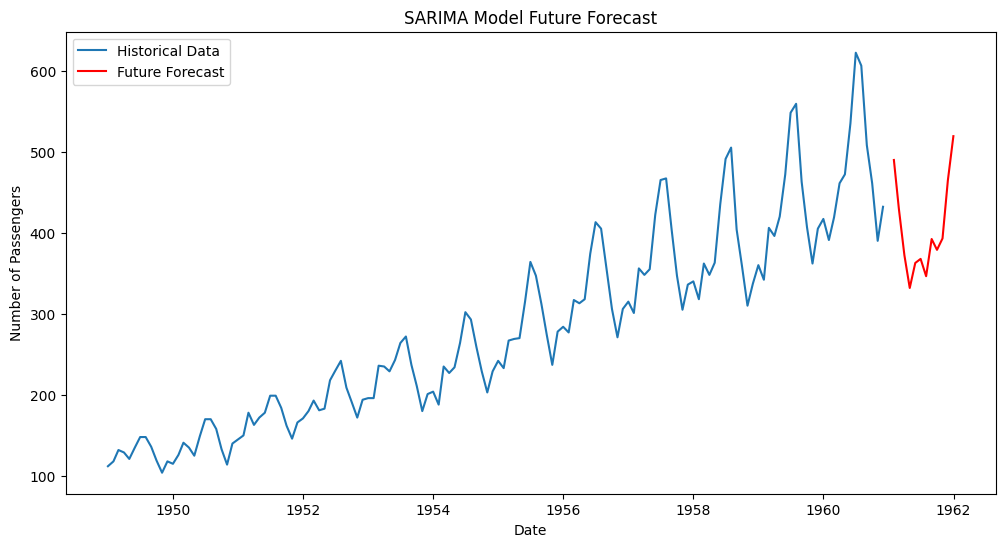

In [138]:
plt.figure(figsize=(12, 6))
# Plot the historical data from original datset
plt.plot(df.index, df['Passengers'], label='Historical Data')
# Plot the forecasted data
plt.plot(future_dates, future_forecast_values, label='Future Forecast', color='Red')
plt.title('SARIMA Model Future Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Thank YOU